In [1]:
import sys
sys.path.append("..")
sys.path.append("../dl")

import torch
import segmentation_models_pytorch as smp
from omegaconf import OmegaConf
from torch import nn

from config import user_conf, get_conf
from inferer import *
from lightning_model import *

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from 

In [2]:
model = smp.FPN(
    encoder_name="resnext50_32x4d",
    classes=2,
    decoder_merge_policy='cat'
)

config = get_conf(user_conf, "pannuke")
segmodel = SegModel.from_conf(model, config)
ckpt = segmodel.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
segmodel.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(segmodel, config)

In [5]:
infobj = inf.run()

Prediction for: Adrenal_gland_fold3_0
Prediction for: Adrenal_gland_fold3_1
Prediction for: Adrenal_gland_fold3_10
Prediction for: Adrenal_gland_fold3_100
Prediction for: Adrenal_gland_fold3_101
Prediction for: Adrenal_gland_fold3_102
Prediction for: Adrenal_gland_fold3_103
Prediction for: Adrenal_gland_fold3_104
Prediction for: Adrenal_gland_fold3_105
Prediction for: Adrenal_gland_fold3_106
Prediction for: Adrenal_gland_fold3_107
Prediction for: Adrenal_gland_fold3_108
Prediction for: Adrenal_gland_fold3_109
Prediction for: Adrenal_gland_fold3_11
Prediction for: Adrenal_gland_fold3_110
Prediction for: Adrenal_gland_fold3_111
Prediction for: Adrenal_gland_fold3_112
Prediction for: Adrenal_gland_fold3_113
Prediction for: Adrenal_gland_fold3_114
Prediction for: Adrenal_gland_fold3_115
Prediction for: Adrenal_gland_fold3_116
Prediction for: Adrenal_gland_fold3_117
Prediction for: Adrenal_gland_fold3_118
Prediction for: Adrenal_gland_fold3_119
Prediction for: Adrenal_gland_fold3_12
Predict

In [5]:
# inf.plot_histograms()

In [6]:
# inf.plot_predictions()

In [7]:
inf.post_process()

In [8]:
# inf.plot_segmentations()

In [9]:
score_df = inf.benchmark(save=True)
score_df

,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_Sensitivity,inst_Precision,splits,merges
Adrenal_gland_fold3_0_metrics,0.570414,0.579503,0.806657,0.5172,0.757328,0.682927,0.608696,0.777778,0.212209,0.559644
Adrenal_gland_fold3_1_metrics,0.52769,0.532595,0.702391,0.485942,0.728913,0.666667,0.586207,0.772727,0.17338,0.757246
Adrenal_gland_fold3_10_metrics,0.637894,0.637894,0.863206,0.594906,0.73655,0.807692,0.7,0.954545,0.193764,0.720158
Adrenal_gland_fold3_100_metrics,0.733908,0.733908,0.906389,0.684725,0.798846,0.857143,0.75,1,0.0464157,0.195363
Adrenal_gland_fold3_101_metrics,0.709348,0.709348,0.912951,0.732835,0.837526,0.875,0.777778,1,0.0531964,0.256184
...,...,...,...,...,...,...,...,...,...,...
Uterus_fold3_96_metrics,0.502123,0.508142,0.617329,0.481178,0.70252,0.684931,0.568182,0.862069,0.327612,0.973934
Uterus_fold3_97_metrics,0.627275,0.635933,0.806601,0.569315,0.728724,0.78125,0.675676,0.925926,0.189058,0.707693
Uterus_fold3_98_metrics,0.583084,0.583084,0.668032,0.49953,0.716717,0.69697,0.676471,0.71875,0.358247,0.664069
Uterus_fold3_99_metrics,0.640477,0.640477,0.854692,0.59048,0.731682,0.807018,0.676471,1,0.123762,0.649063


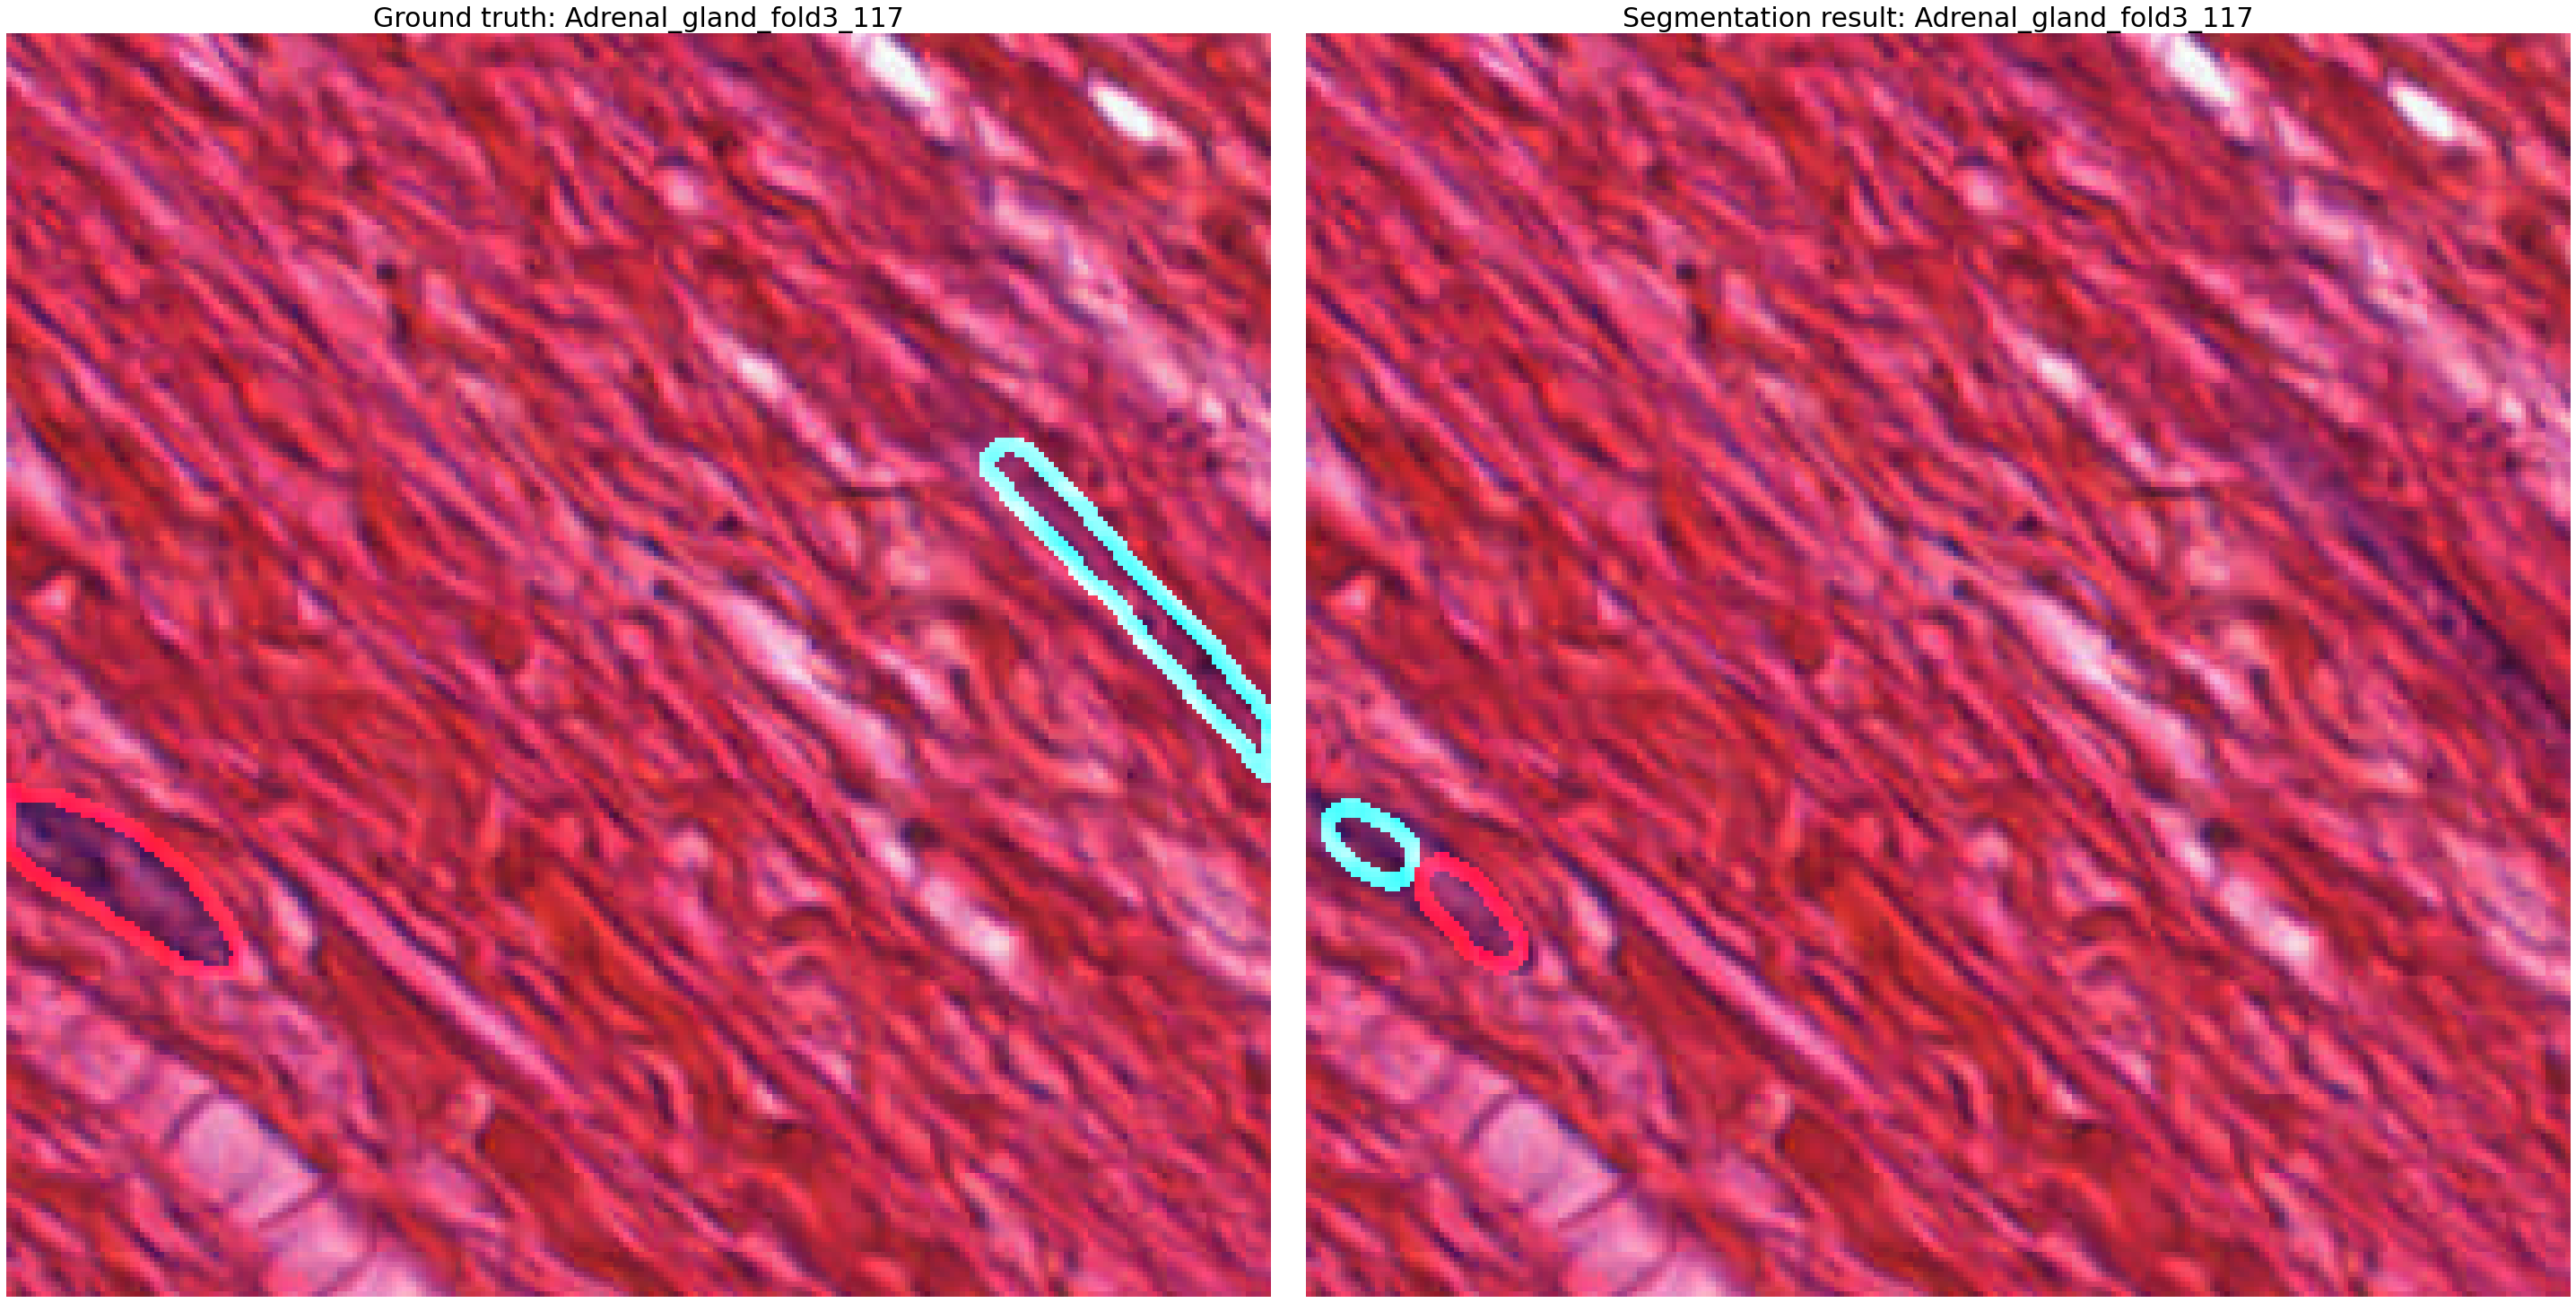

In [17]:
inf.plot_overlays(ixs=[21], save=False)

In [12]:
type(conf)

omegaconf.dictconfig.DictConfig

In [20]:
pannuke_test_fold = [fold for fold, phase in inf.pannuke_folds.items() if phase == inf.fold][0]

In [43]:
p1 = inf.get_pannuke_fold(["fold2", "fold3"], ["Ovarian"], "img")["img"]

In [21]:
pannuke_test_fold

'fold3'